# AFTER FEATURE ENGINEERING

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


from sklearn import metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# from sklearn.preprocessing import Imputer


from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [4]:
import sklearn.model_selection
# help(sklearn.model_selection)

In [ ]:
xlsx = pd.ExcelFile('Feat_extracts well3.xlsx')
df = pd.read_excel(xlsx, 'PCAs')
dataset_pca= df.copy()
dataset_pca

In [ ]:
# import treated data
# dataset_pca['PC1', 'PC2']

convert 3d to 2d
# dataset_pca.pop('PC3')

# print(dataset_pca[:,[1,2]])

In [ ]:
dataset_pca


In [ ]:


dataset_pca.pop('index')

# dataset_pca1= dataset_pca('PC1','PC1','PC3')
dataset_pca

In [ ]:

dataset_pca.describe()

In [ ]:
# import treated data

xlsx_3 = pd.ExcelFile('Feat_extracts well3.xlsx')
df_3 = pd.read_excel(xlsx_3, 'target')
pca_target= df_3.copy()

pca_target

In [ ]:
train_input, test_input, train_target, test_target = model_selection.train_test_split(dataset_pca, pca_target['RHOB'], train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))

# df_set = pca_input_train.append(pca_input_test)

# _ = sns.displot(df_set, x="RHOB" ,hue="type", kind="kde", log_scale=False)





In [7]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 1X')
dataset1= df.copy()




from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())

    # dropping columns
droppies= ['SFL', 'LLS', 'ITT']
dataset.drop(droppies, inplace=True, axis=1)

# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))


[[-1.73192582  0.92328989 -1.24778008 ... -1.52040625 -0.81974287
   0.2471976 ]
 [-1.73167583  0.79296935 -1.20528985 ... -1.41882247 -0.83080071
   0.19688167]
 [-1.73142584  0.66264882 -1.1503758  ... -1.41707103 -0.84349003
   0.14656574]
 ...
 [ 1.73142584 -1.66620868  1.17928032 ...  0.91804219 -0.17453623
  -2.00849727]
 [ 1.73167583 -1.67133066  1.18623864 ...  0.91497716 -0.16837285
  -2.02142083]
 [ 1.73192582 -1.66857639  1.24497167 ...  0.98415921 -0.16488329
  -2.06777966]]
train samples: 9699
test samples 4158


In [6]:
dataset

,DEPTH,CALI,GR,ILD,ITT,MSFL,RHOB,SP
0,-1.731639,2.516979,0.147815,0.637840,-0.317773,-0.685180,-2.877258,-3.067635
1,-1.730816,2.529231,0.412963,-0.218280,-0.412743,-0.685559,-2.939449,-3.747738
2,-1.729992,2.541482,0.803474,-0.114471,-0.507713,-0.685904,-3.001640,-4.217849
3,-1.729169,2.553733,1.058458,0.136484,-0.602683,-0.685559,-3.063831,-4.944131
4,-1.728345,2.565985,1.026933,0.278547,-0.593186,-0.685870,-3.126022,-5.242861
...,...,...,...,...,...,...,...,...
4202,1.728345,-0.575181,-0.686343,-0.077954,-1.386187,-0.267572,-0.008639,1.709306
4203,1.729169,-0.575474,-0.659878,-0.065343,-1.362445,-0.270226,-0.029158,1.746619
4204,1.729992,-0.575767,-0.633413,-0.044466,-1.343451,-0.272881,0.060321,1.754365
4205,1.730816,-0.575968,-0.606948,-0.023588,-1.329205,-0.275536,0.145992,1.742303


In [8]:
## Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
objective = ['reg:squarederror']


subsample = [0.5, 0.7]
colsample_bytree= [0.5, 0.7]
n_estimators = [100, 500, 900, 1100, 1500]

learning_rate=[0.05,0.01,0.05, 0.08,0.095, 0.1,0.15,0.20]
max_depth = [2, 3, 5, 10, 15 ]
min_child_weight=[1,2,3,4,6,8,10]

In [9]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


hyperparameter_grid2={
    
}

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [10]:
# Set up the random search with 4-fold cross validation
import xgboost
xgb_model1 =xgboost.XGBRegressor()

xgb_model2 = XGBRegressor()

random_cv = RandomizedSearchCV(estimator=xgb_model1,
                                param_distributions=hyperparameter_grid,
                                cv=5, 
                                n_iter=50,
                                scoring = 'neg_mean_absolute_error',
                                n_jobs = -1,
                                verbose = 5, 
                                return_train_score = True,
                                random_state=42)


gsearch = GridSearchCV(estimator = xgb_model2,
                        param_grid = param_tuning,                        
                        #scoring = 'neg_mean_absolute_error', #MAE
                        #scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)



In [ ]:
    xgb_model = XGBRegressor()
    xgb_model.fit(train_input, train_target, early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False)



In [ ]:
    gsearch.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

In [ ]:
# Best params
gsearch.best_params_

In [11]:
random_cv.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.3min


[0]	validation_0-rmse:1.19026
[1]	validation_0-rmse:1.10355
[2]	validation_0-rmse:1.02388
[3]	validation_0-rmse:0.95071
[4]	validation_0-rmse:0.88376
[5]	validation_0-rmse:0.82268


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.0min finished


[6]	validation_0-rmse:0.76647
[7]	validation_0-rmse:0.71495
[8]	validation_0-rmse:0.66847
[9]	validation_0-rmse:0.62575
[10]	validation_0-rmse:0.58686
[11]	validation_0-rmse:0.55145
[12]	validation_0-rmse:0.51854
[13]	validation_0-rmse:0.48850
[14]	validation_0-rmse:0.46173
[15]	validation_0-rmse:0.43766
[16]	validation_0-rmse:0.41598
[17]	validation_0-rmse:0.39630
[18]	validation_0-rmse:0.37835
[19]	validation_0-rmse:0.36169
[20]	validation_0-rmse:0.34660
[21]	validation_0-rmse:0.33303
[22]	validation_0-rmse:0.32094
[23]	validation_0-rmse:0.31039
[24]	validation_0-rmse:0.30042
[25]	validation_0-rmse:0.29157
[26]	validation_0-rmse:0.28413
[27]	validation_0-rmse:0.27760
[28]	validation_0-rmse:0.27163
[29]	validation_0-rmse:0.26615
[30]	validation_0-rmse:0.26117
[31]	validation_0-rmse:0.25664
[32]	validation_0-rmse:0.25270
[33]	validation_0-rmse:0.24910
[34]	validation_0-rmse:0.24610
[35]	validation_0-rmse:0.24313
[36]	validation_0-rmse:0.24058
[37]	validation_0-rmse:0.23830
[38]	validat

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          verbosity=None),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
              

In [12]:
# Best params
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Run only in the first run of the kernel.
hyperParameterTuning(train_input, train_target)

In [ ]:
Best Params
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.5}


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}

# Best Fit

In [ ]:
model_Test = XGBRegressor(booster='gbtree',                      
                          colsample_bytree= 0.5,
                          learning_rate= 0.1,
                          max_depth= 3,
                          min_child_weight= 5,
                          n_estimators= 200,
                          objective= 'reg:squarederror',
                          subsample= 0.7
               
                        )
model_Test.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )




In [13]:
model_Test2= XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

model_Test2.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Plot results

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'Predicted')

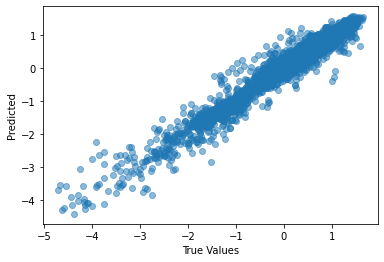

In [14]:
predicted = model_Test2.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')

In [15]:
print("r2 score: {}".format(metrics.r2_score(test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.9564422086965766
mse: 0.045836139622607075
rmse: 0.21409376362380825
mae: 0.13933403328928448


# PREDICT DIFF WELL

In [ ]:
# Feat_extracts well3

xlsx_2 = pd.ExcelFile('Feat_extracts well4.xlsx')
df_2 = pd.read_excel(xlsx_2, 'PCAs')
dataset_pca_2= df_2.copy()


dataset_pca_2.pop('PC3')
dataset_pca_2.pop('index')

dataset_pca_2

In [ ]:
xlsx_2y = pd.ExcelFile('Feat_extracts well4.xlsx')
df_2y = pd.read_excel(xlsx_2y, 'target')
pca_target_2y= df_2y.copy()

# pca_target_2y.pop('RHOB')
pca_target_2y

In [ ]:
predicted_2y = model_Test2.predict(dataset_pca_2)

fig, ax = plt.subplots()
ax.scatter(pca_target_2y, predicted_2y, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')

In [ ]:
print("r2 score: {}".format(metrics.r2_score(pca_target_2y, predicted_2y)))
print("mse: {}".format(metrics.mean_squared_error(pca_target_2y, predicted_2y)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_2y, predicted_2y))))
print("mae: {}".format(metrics.mean_absolute_error(pca_target_2y, predicted_2y)))

In [ ]:
# Feat_extracts well3

xlsx_4 = pd.ExcelFile('Feat_extracts well4.xlsx')
df_4 = pd.read_excel(xlsx_4, 'PCAs')
dataset_pca_4= df_4.copy()


# dataset_pca_4.pop('PC3')
dataset_pca_4.pop('index')

dataset_pca_4

In [ ]:
xlsx_4y = pd.ExcelFile('Feat_extracts well4.xlsx')
df_4y = pd.read_excel(xlsx_4y, 'target')
pca_target_4y= df_4y.copy()

pca_target_4y.pop('RHOB')
pca_target_4y

In [ ]:
predicted_4y = model_Test2.predict(dataset_pca_4)

fig, ax = plt.subplots()
ax.scatter(pca_target_4y, predicted_4y, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')

In [ ]:
print("r2 score: {}".format(metrics.r2_score(pca_target_4y, predicted_4y)))
print("mse: {}".format(metrics.mean_squared_error(pca_target_4y, predicted_4y)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_4y, predicted_4y))))
print("mae: {}".format(metrics.mean_absolute_error(pca_target_4y, predicted_4y)))

In [ ]:
# Feat_extracts well3
def predictme(well_name):
    xlsx_2 = pd.ExcelFile(well_name)
    df_2 = pd.read_excel(xlsx_2, 'PCAs')
    dataset_pca_2= df_2.copy()


    # dataset_pca.pop('PC3')
    dataset_pca_2.pop('index')

    dataset_pca_2


    xlsx_2y = pd.ExcelFile(well_name)
    df_2y = pd.read_excel(xlsx_2y, 'target')
    pca_target_2y= df_2y.copy()

    # pca_target_2y.pop('RHOB')
    pca_target_2y



    predicted_2y = model_Test2.predict(dataset_pca_2)

    fig, ax = plt.subplots()
    ax.scatter(pca_target_2y, predicted_2y, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(pca_target_2y, predicted_2y)))
    print("mse: {}".format(metrics.mean_squared_error(pca_target_2y, predicted_2y)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_2y, predicted_2y))))
    print("mae: {}".format(metrics.mean_absolute_error(pca_target_2y, predicted_2y)))
    
    return 

predictme("Feat_extracts well2.xlsx")

r2 score: 0.550335902416184
mse: 0.44966409758381587
rmse: 0.6705699796321155
mae: 0.4749254805607181


D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


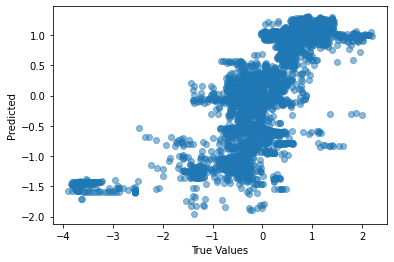

In [18]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset_ext= df.copy()


    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset_ext)
    data1_Sd= Sd_scaler1.transform(dataset_ext)
    # print(data1_Sd)

            #convert to dataframe
    dataset= pd.DataFrame(data1_Sd, columns=dataset_ext.keys())

    # dropping columns
#     droppies= ['SFL' , 'NPHI', 'LLS', 'LLD']
    dataset.drop(droppies, inplace=True, axis=1)

#     print(dataset)
    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model_Test2.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 4X')
# predictme("Feat_extracts well4.xlsx")